In [12]:
import pandas as pd
from pathlib import Path

# Read the dataset into a DataFrame
df = pd.read_csv(Path('machine_temp_failure_missing.csv'))

df

,timestamp,value
0,02-12-2013 21:15,73.967322
1,02-12-2013 21:20,74.935882
2,02-12-2013 21:25,76.124162
3,02-12-2013 21:30,78.140707
4,02-12-2013 21:35,79.329836
...,...,...
22690,19-02-2014 15:05,98.185415
22691,19-02-2014 15:10,97.804168
22692,19-02-2014 15:15,97.135468
22693,19-02-2014 15:20,98.056852


In [13]:
# Inspect the dataset
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22695 entries, 0 to 22694
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  22695 non-null  object 
 1   value      21410 non-null  float64
dtypes: float64(1), object(1)
memory usage: 354.7+ KB


In [25]:
# Look for missing values
df.isnull().sum()



timestamp       0
value        1285
dtype: int64

In [30]:
# Calculate mean
df2 = df.fillna(value = 0)
df2
df2.isnull().sum()
mean = df2.mean()
mean

/var/folders/gh/x_3x_yf907z7c2w3yx7k55r00000gn/T/ipykernel_23718/4114835346.py:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean = df2.mean()


value    81.100634
dtype: float64

In [11]:


# Rename value column to temperature
df.rename(columns={'value':'temperature'}, inplace=True)
df

,timestamp,temperature
0,02-12-2013 21:15,73.967322
1,02-12-2013 21:20,74.935882
2,02-12-2013 21:25,76.124162
3,02-12-2013 21:30,78.140707
4,02-12-2013 21:35,79.329836
...,...,...
22690,19-02-2014 15:05,98.185415
22691,19-02-2014 15:10,97.804168
22692,19-02-2014 15:15,97.135468
22693,19-02-2014 15:20,98.056852


In [31]:
df2.max()

timestamp    31-12-2013 23:55
value              108.510543
dtype: object

In [33]:
df2.min()

timestamp    01-01-2014 00:00
value                     0.0
dtype: object

In [36]:
df.rename(columns={'value':'temperature'}, inplace=True)
df

,timestamp,temperature
0,02-12-2013 21:15,73.967322
1,02-12-2013 21:20,74.935882
2,02-12-2013 21:25,76.124162
3,02-12-2013 21:30,78.140707
4,02-12-2013 21:35,79.329836
...,...,...
22690,19-02-2014 15:05,98.185415
22691,19-02-2014 15:10,97.804168
22692,19-02-2014 15:15,97.135468
22693,19-02-2014 15:20,98.056852


In [41]:
df2.rename(columns={'value':'temperature'}, inplace=True)
df2

,timestamp,temperature
0,02-12-2013 21:15,73.967322
1,02-12-2013 21:20,74.935882
2,02-12-2013 21:25,76.124162
3,02-12-2013 21:30,78.140707
4,02-12-2013 21:35,79.329836
...,...,...
22690,19-02-2014 15:05,98.185415
22691,19-02-2014 15:10,97.804168
22692,19-02-2014 15:15,97.135468
22693,19-02-2014 15:20,98.056852


In [52]:
df2['delta_temperature'] = 0
for i in range(len(df2) - 1) :
    df2.loc[i , 'delta_temperature'] = df2.loc[i+1 , 'temperature'] - df2.loc[i , 'temperature']
    
df2.loc[len(df2) - 1 , 'delta_temperature'] = 0
df2

,timestamp,temperature,delta_temperature
0,02-12-2013 21:15,73.967322,0.968560
1,02-12-2013 21:20,74.935882,1.188280
2,02-12-2013 21:25,76.124162,2.016546
3,02-12-2013 21:30,78.140707,1.189128
4,02-12-2013 21:35,79.329836,-0.619417
...,...,...,...
22690,19-02-2014 15:05,98.185415,-0.381246
22691,19-02-2014 15:10,97.804168,-0.668700
22692,19-02-2014 15:15,97.135468,0.921384
22693,19-02-2014 15:20,98.056852,-1.152991


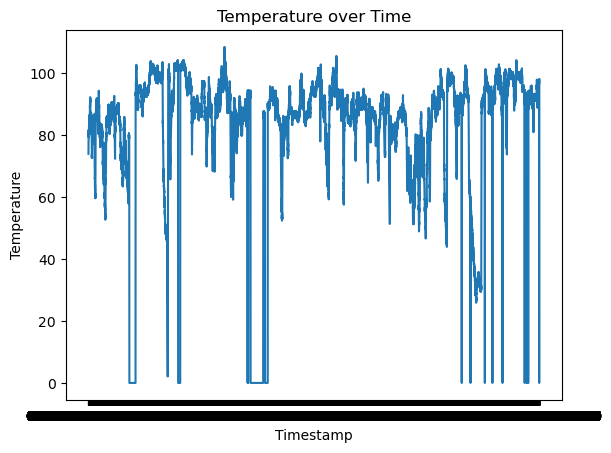

In [57]:
import matplotlib.pyplot as plt

plt.plot(df2['timestamp'], df2['temperature'])
plt.xlabel('Timestamp')
plt.ylabel('Temperature')
plt.title('Temperature over Time')
plt.show()

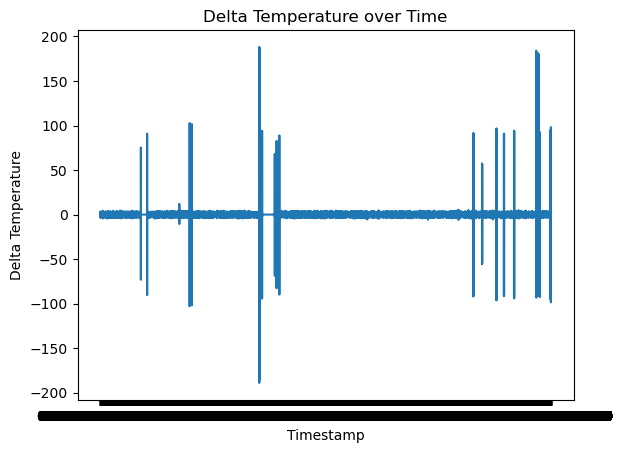

In [56]:
import matplotlib.pyplot as plt

plt.plot(df2['timestamp'], df2['delta_temperature'].diff())
plt.xlabel('Timestamp')
plt.ylabel('Delta Temperature')
plt.title('Delta Temperature over Time')
plt.show()

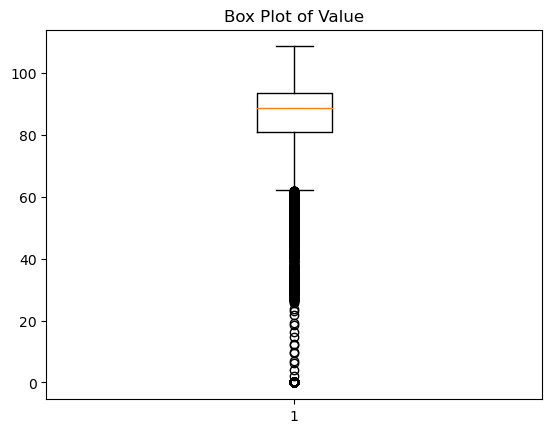

In [59]:

import matplotlib.pyplot as plt

plt.boxplot(df2['temperature'])
plt.title('Box Plot of Value')
plt.show()



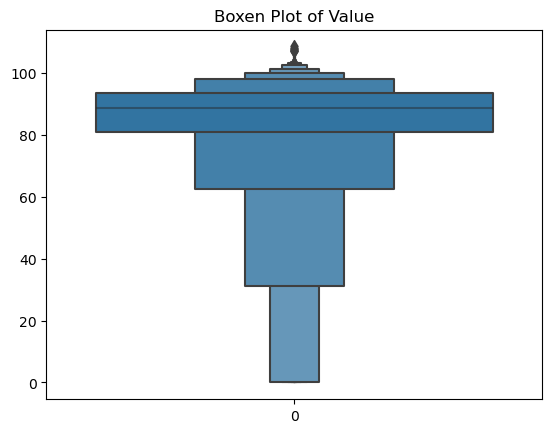

In [61]:

import seaborn as sns

sns.boxenplot(df2['temperature'])
plt.title('Boxen Plot of Value')
plt.show()



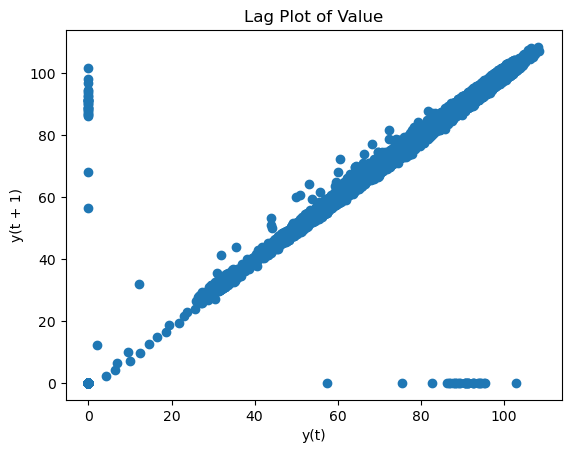

In [62]:

import pandas as pd

pd.plotting.lag_plot(df2['temperature'])
plt.title('Lag Plot of Value')
plt.show()
